In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
drive.mount('/content/drive')
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 2/penguins.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
ds.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [6]:
ds = ds.dropna()

In [7]:
ds.count()

,0
Unnamed: 0,333
species,333
island,333
bill_length_mm,333
bill_depth_mm,333
flipper_length_mm,333
body_mass_g,333
sex,333
year,333


In [8]:
ds.nunique()

,0
Unnamed: 0,333
species,3
island,3
bill_length_mm,163
bill_depth_mm,79
flipper_length_mm,54
body_mass_g,93
sex,2
year,3


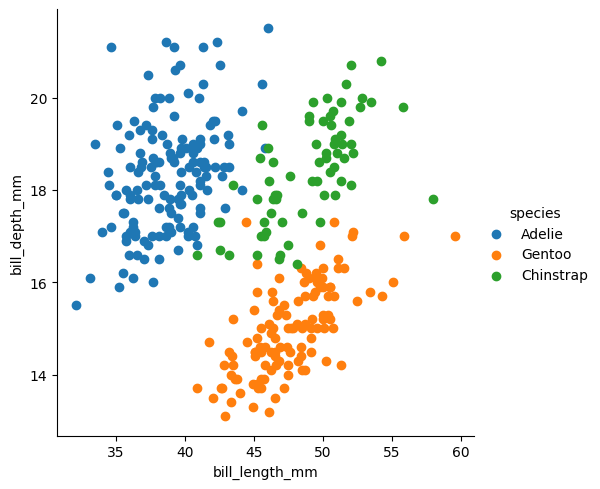

In [9]:
sns.FacetGrid(ds, hue="species", height=5).map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()

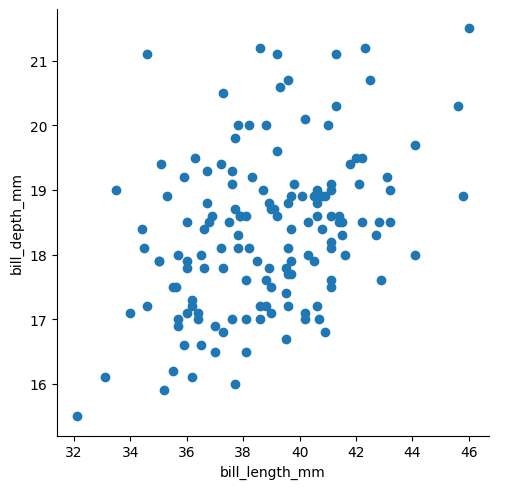

In [10]:
Adelie_species_data = ds[ds['species'] == 'Adelie']

sns.FacetGrid(Adelie_species_data, height=5).map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()

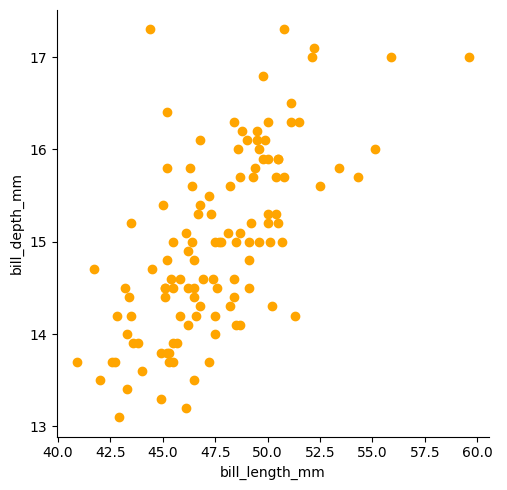

In [11]:
Gentoo_species_data = ds[ds['species'] == 'Gentoo']

sns.FacetGrid(Gentoo_species_data, height=5).map(plt.scatter, "bill_length_mm", "bill_depth_mm", color="orange").add_legend()

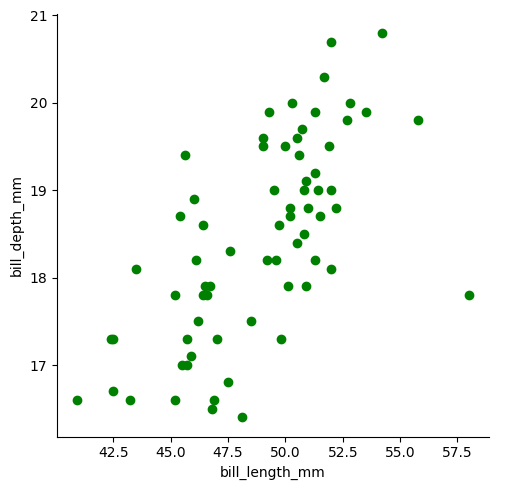

In [12]:
Chinstrap_species_data = ds[ds['species'] == 'Chinstrap']

sns.FacetGrid(Chinstrap_species_data, height=5).map(plt.scatter, "bill_length_mm", "bill_depth_mm", color="green").add_legend()

<ipython-input-13-c9935552bdfb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="bill_length_mm", data=ds, palette={"Adelie": "blue", "Chinstrap": "orange", "Gentoo": "green"})


<Axes: xlabel='species', ylabel='bill_length_mm'>

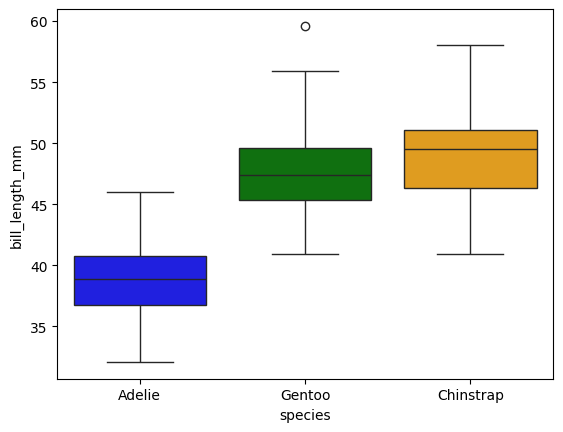

In [13]:
sns.boxplot(x="species", y="bill_length_mm", data=ds, palette={"Adelie": "blue", "Chinstrap": "orange", "Gentoo": "green"})

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


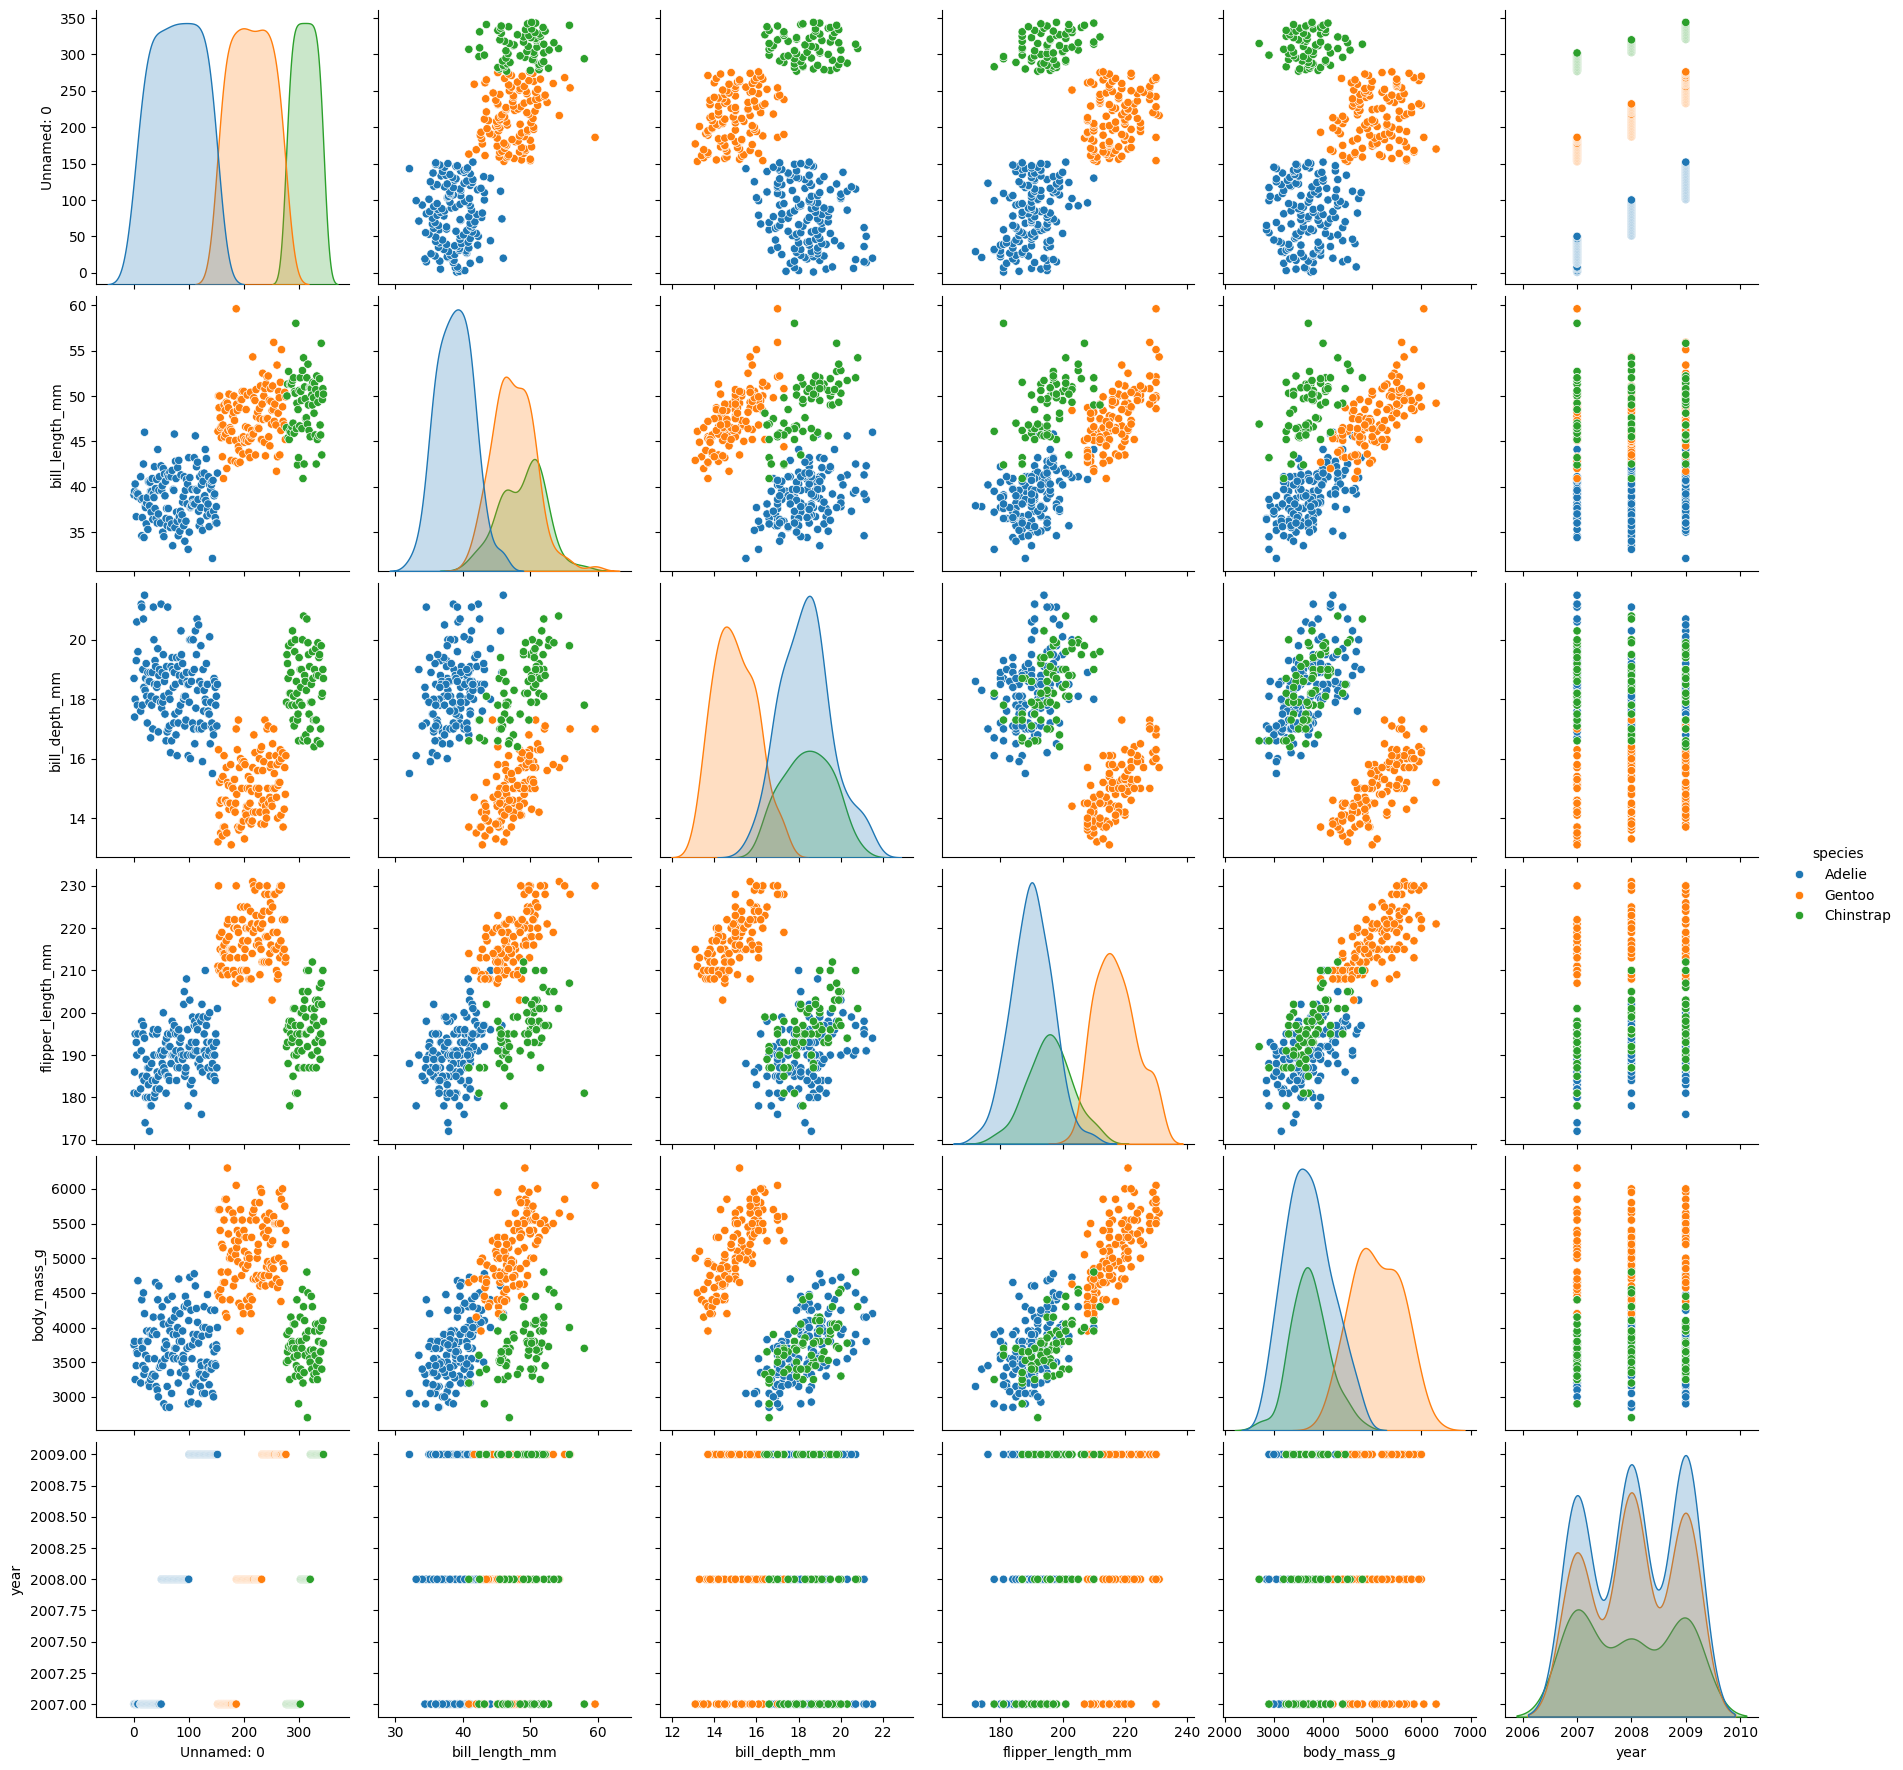

In [14]:
sns.pairplot(ds, hue="species", size=3)

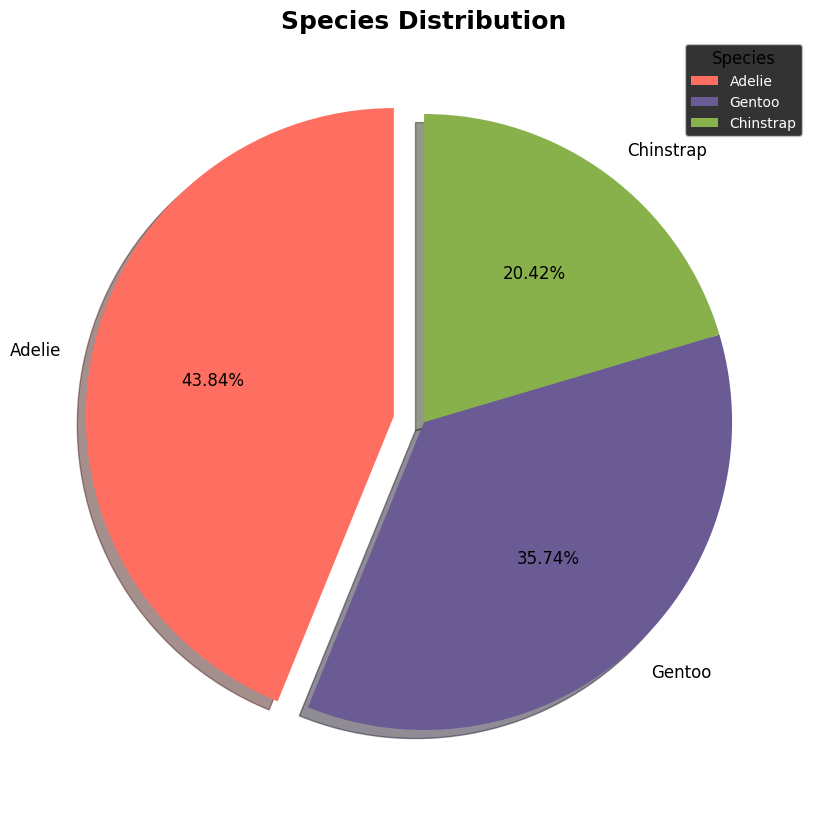

In [15]:
species = ds.species.value_counts()
plt.figure(figsize=(10, 10))
plt.title("Species Distribution", fontsize=18, fontweight='bold')

colors = ["#FF6F61", "#6B5B95", "#88B04B"]
explode = [0.1, 0, 0]

plt.pie(
    species.values,
    labels=species.index,
    autopct="%.2f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.legend(
    facecolor='black',
    labelcolor="white",
    loc="upper right",
    fontsize=10,
    title="Species",
    title_fontsize="12"
)

plt.show()